In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls "/content/drive/My Drive"

 Classroom	    network-security.xlsx  'Resume (1).pdf'   Resume.pdf
'Colab Notebooks'  'ODC Consent.pdf'	   'Resume (2).pdf'  'test_Tom Holland.jpeg'
 IMG_8226.jpeg	    pins_dataset	   'Resume (3).pdf'  'Week 2 - Assignment.gslides'


In [3]:
# Navigate to dataset
images_path = '/content/drive/MyDrive/pins_dataset/105_classes_pins_dataset/'

In [4]:
import os

# Function to count images in a folder
def count_images_in_folder(folder_path):
    return len([file for file in os.listdir(folder_path) if file.endswith(".jpg")])

In [5]:
# List to hold names of classes withmore than 170 images
classes_with_more_than_170_images = []

In [6]:
# Iterate through each folder in the dataset path
for folder in os.listdir(images_path):
    folder_path = os.path.join(images_path, folder)
    if os.path.isdir(folder_path):
        image_count = count_images_in_folder(folder_path)
        if image_count >= 170:
            print(f"Folder: {folder}, Image Count: {image_count}")
            classes_with_more_than_170_images.append(folder)

# Print the results
print(f"Number of classes with more than 170 images: {len(classes_with_more_than_170_images)}")

Folder: pins_Adriana Lima, Image Count: 213
Folder: pins_Alexandra Daddario, Image Count: 225
Folder: pins_Andy Samberg, Image Count: 196
Folder: pins_Anne Hathaway, Image Count: 203
Folder: pins_Brenton Thwaites, Image Count: 209
Folder: pins_Chris Pratt, Image Count: 176
Folder: pins_Danielle Panabaker, Image Count: 181
Folder: pins_Emilia Clarke, Image Count: 210
Folder: pins_Emma Watson, Image Count: 211
Folder: pins_Gwyneth Paltrow, Image Count: 187
Folder: pins_Henry Cavil, Image Count: 195
Folder: pins_Hugh Jackman, Image Count: 179
Folder: pins_Jason Momoa, Image Count: 184
Folder: pins_Jennifer Lawrence, Image Count: 180
Folder: pins_Johnny Depp, Image Count: 182
Folder: pins_Katharine Mcphee, Image Count: 177
Folder: pins_Katherine Langford, Image Count: 226
Folder: pins_Krysten Ritter, Image Count: 171
Folder: pins_Leonardo DiCaprio, Image Count: 237
Folder: pins_Logan Lerman, Image Count: 212
Folder: pins_Madelaine Petsch, Image Count: 192
Folder: pins_Maisie Williams, Imag

In [7]:
import os
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Function to count images in a folder
def count_images_in_folder(folder_path):
    return len([file for file in os.listdir(folder_path) if file.endswith(".jpg")])

In [8]:
# Get folders (names) with more than 170 images
sufficient_images_names = [
    folder for folder in os.listdir(images_path)
    if os.path.isdir(os.path.join(images_path, folder)) and count_images_in_folder(os.path.join(images_path, folder)) >= 170
]

In [9]:
print(f"Number of people with at least 170 images: {len(sufficient_images_names)}")

Number of people with at least 170 images: 50


In [10]:
# Function to load image paths for a specific person
def load_image_paths_for_name(name, base_path):
    name_path = os.path.join(base_path, name)
    return [
        os.path.join(name_path, file)
        for file in os.listdir(name_path) if file.endswith(".jpg")
    ]

In [11]:
# Function to create DataFrame
def create_image_dataframe(names, base_path, test_size=0.2, random_state=42):
    data = []
    for name in names:
        # Load all image paths for the current name
        image_paths = load_image_paths_for_name(name, base_path)

        # Append to the data list
        data.extend([(path, name) for path in image_paths])

    # Convert the data into a DataFrame
    df = pd.DataFrame(data, columns=["image_path", "label"])

    # Split the DataFrame into train and test sets while ensuring all classes are represented
    train_df, test_df = train_test_split(df, test_size=test_size, stratify=df['label'], random_state=random_state)

    # Add a column to indicate the set
    train_df['set'] = 'train'
    test_df['set'] = 'test'

    # Combine train and test DataFrames
    combined_df = pd.concat([train_df, test_df], ignore_index=True)

    return combined_df

In [12]:
# Create the DataFrame
df = create_image_dataframe(sufficient_images_names, images_path)

In [13]:
# Verify train/test split
train_count = df[df["set"] == "train"].shape[0]
test_count = df[df["set"] == "test"].shape[0]
print(f"Number of training images: {train_count}")
print(f"Number of testing images: {test_count}")

Number of training images: 7845
Number of testing images: 1962


In [14]:
# Extracts the train and test subsets from the combined DataFrame
train_df = df[df["set"] == "train"]
test_df = df[df["set"] == "test"]

print(f"Train DataFrame sample:\n{train_df.head()}")
print(f"Test DataFrame sample:\n{test_df.head()}")

Train DataFrame sample:
                                          image_path                    label  \
0  /content/drive/MyDrive/pins_dataset/105_classe...     pins_Morena Baccarin   
1  /content/drive/MyDrive/pins_dataset/105_classe...   pins_Jennifer Lawrence   
2  /content/drive/MyDrive/pins_dataset/105_classe...           pins_gal gadot   
3  /content/drive/MyDrive/pins_dataset/105_classe...        pins_Hugh Jackman   
4  /content/drive/MyDrive/pins_dataset/105_classe...  pins_Danielle Panabaker   

     set  
0  train  
1  train  
2  train  
3  train  
4  train  
Test DataFrame sample:
                                             image_path  \
7845  /content/drive/MyDrive/pins_dataset/105_classe...   
7846  /content/drive/MyDrive/pins_dataset/105_classe...   
7847  /content/drive/MyDrive/pins_dataset/105_classe...   
7848  /content/drive/MyDrive/pins_dataset/105_classe...   
7849  /content/drive/MyDrive/pins_dataset/105_classe...   

                      label   set  
7845     

In [15]:
# Get the label counts for train and test sets
train_label_counts = df[df["set"] == "train"]['label'].value_counts()
test_label_counts = df[df["set"] == "test"]['label'].value_counts()

In [16]:
label_counts = pd.DataFrame({
    'Train': train_label_counts,
    'Test': test_label_counts
}).fillna(0)  # Fill missing labels with 0

In [17]:
# Check for any test labels not present in the train data
unseen_test_labels = test_df[~test_df['label'].isin(train_df['label'])]

if not unseen_test_labels.empty:
    print(f"Unseen test labels: \n{unseen_test_labels}")
else:
    print("All test labels are present in the train set.")

All test labels are present in the train set.


In [18]:
from sklearn.preprocessing import LabelEncoder

# Encode labels directly in the original DataFrame 'df'
label_encoder = LabelEncoder()
df.loc[df['set'] == 'train', 'encoded_label'] = label_encoder.fit_transform(df.loc[df['set'] == 'train', 'label'])
df.loc[df['set'] == 'test', 'encoded_label'] = label_encoder.transform(df.loc[df['set'] == 'test', 'label'])

# Access train and test DataFrames from the updated 'df'
train_df = df[df["set"] == "train"]
test_df = df[df["set"] == "test"]

print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
print("Class Distribution in Train Data:\n", train_df['encoded_label'].value_counts())

Train Data Shape: (7845, 4)
Test Data Shape: (1962, 4)
Class Distribution in Train Data:
 encoded_label
18.0    190
29.0    186
16.0    181
1.0     180
42.0    177
47.0    177
40.0    174
0.0     170
19.0    170
8.0     169
39.0    169
7.0     168
4.0     167
23.0    167
31.0    163
3.0     162
46.0    162
48.0    161
44.0    159
27.0    158
41.0    158
33.0    158
2.0     157
10.0    156
21.0    154
32.0    154
20.0    154
25.0    153
37.0    153
35.0    151
9.0     150
43.0    150
30.0    149
38.0    149
12.0    147
14.0    146
45.0    146
34.0    145
6.0     145
13.0    144
49.0    144
11.0    143
36.0    143
24.0    142
15.0    142
28.0    142
22.0    142
5.0     141
26.0    140
17.0    137
Name: count, dtype: int64


In [19]:
batch_size = 32
img_height, img_width = 224, 224

In [20]:
train_df = train_df.copy()
test_df = test_df.copy()

# Convert labels to strings for compatibility with categorical mode
train_df['encoded_label'] = train_df['encoded_label'].astype(str)
test_df['encoded_label'] = test_df['encoded_label'].astype(str)

In [21]:
import tensorflow as tf
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.utils import to_categorical

# Assuming num_classes is the number of unique encoded labels
num_classes = len(train_df['encoded_label'].unique())  # Define num_classes here
print(f"Number of classes: {num_classes}")

# Preprocess image
def preprocess_image(img_path, label):
    # Load image
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Decode image
    img = tf.image.resize(img, [224, 224])  # Resize to target size
    img = preprocess_input(img)  # Apply ResNet preprocessing

    # Convert label to one-hot encoding
    label = tf.one_hot(label, depth=num_classes)  # num_classes is now accessible

    return img, label

# Create a TensorFlow dataset
def create_dataset(df, batch_size):
    # No need to convert to integers, labels should be strings for one-hot encoding
    # Make sure 'encoded_label' is of type int
    df['encoded_label'] = df['encoded_label'].astype(float).astype(int)

    dataset = tf.data.Dataset.from_tensor_slices((df['image_path'].values, df['encoded_label'].values))
    dataset = dataset.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)
    return dataset

def augment_image(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img, max_delta=0.2)
    img = tf.image.random_contrast(img, lower=0.8, upper=1.2)
    img = tf.image.random_hue(img, max_delta=0.02)  # Adjust hue
    img = tf.image.random_saturation(img, lower=0.8, upper=1.2)  # Adjust saturation
    return img, label

batch_size = 32
train_dataset = create_dataset(train_df, batch_size)
test_dataset = create_dataset(test_df, batch_size)

train_dataset = train_dataset.map(augment_image, num_parallel_calls=tf.data.AUTOTUNE)

print("Train Dataset:", train_dataset)
print("Test Dataset:", test_dataset)

Number of classes: 50
Train Dataset: <_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 50), dtype=tf.float32, name=None))>
Test Dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 50), dtype=tf.float32, name=None))>


In [22]:
# preserves the input dimensions and uses a residual connection to bypass some layers,
# ensuring that the network learns identity mappings more easily.
def identity_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x

    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)

    # Adjust the number of channels in x_skip to match x using a 1x1 convolution
    # if necessary
    num_channels_x = x.shape[-1]  # Get the number of channels in x
    num_channels_x_skip = x_skip.shape[-1]  # Get the number of channels in x_skip

    if num_channels_x != num_channels_x_skip:  # If channel numbers don't match
        x_skip = tf.keras.layers.Conv2D(filter, (1, 1), padding='same')(x_skip)  # Apply 1x1 convolution

    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [23]:
# changes the spatial dimensions (height and width) of the input tensor using strides.
def convolutional_block(x, filter):
    # copy tensor to variable called x_skip
    x_skip = x

    # Layer 1
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same', strides = (2,2))(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)

    # Layer 2
    x = tf.keras.layers.Conv2D(filter, (3,3), padding = 'same')(x)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)

    # Processing Residue with conv(1,1)
    x_skip = tf.keras.layers.Conv2D(filter, (1,1), strides = (2,2))(x_skip)

    # Add Residue
    x = tf.keras.layers.Add()([x, x_skip])
    x = tf.keras.layers.Activation('relu')(x)
    return x

In [24]:
from tensorflow.keras.regularizers import l2

def ResNet(input_shape, num_classes):
    inputs = tf.keras.Input(shape=input_shape)

    # Initial Conv Layer
    x = tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = tf.keras.layers.BatchNormalization(axis=3)(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Stage 1
    x = identity_block(x, 64)
    x = identity_block(x, 64)

    # Stage 2
    x = convolutional_block(x, 128)
    x = identity_block(x, 128)

    # Stage 3
    x = convolutional_block(x, 256)
    x = identity_block(x, 256)

    # Stage 4
    x = convolutional_block(x, 512)
    x = identity_block(x, 512)

    # Global Average Pooling to reduces the spatial dimensions to a single value per channel.
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dropout(0.8)(x)  # Dropout for regularization

    # Adds a fully connected layer with 128 units and L2 regularization to reduce overfitting.
    x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)

    # Final Output Layer
    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # Create Model
    model = tf.keras.Model(inputs, outputs)
    return model


In [25]:
# Assuming num_classes is the number of unique encoded labels
num_classes = len(train_df['encoded_label'].unique())
print(f"Number of classes: {num_classes}")

Number of classes: 50


In [33]:
# Build the model
input_shape = (img_height, img_width, 3)
model = ResNet(input_shape, num_classes)

In [34]:
# Compile model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
# Model summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 112, 112, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_17    │ (None, 112, 112, 32)   │            128 │ conv2d_21[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_17             │ (None, 112, 112, 32)   │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 56, 56, 32)     │              0 │ activation_17[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 56, 56, 64)     │         18,496 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_18    │ (None, 56, 56, 64)     │            256 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_18             │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ activation_18[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_19    │ (None, 56, 56, 64)     │            256 │ conv2d_23[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 56, 56, 64)     │          2,112 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_8 (Add)               │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
│                           │                        │                │ conv2d_24[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_19             │ (None, 56, 56, 64)     │              0 │ add_8[0][0]            │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ activation_19[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_20    │ (None, 56, 56, 64)     │            256 │ conv2d_25[0][0]        │
│ (BatchNormalization) 

 Total params: 11,234,418 (42.86 MB)

 Trainable params: 11,226,674 (42.83 MB)

 Non-trainable params: 7,744 (30.25 KB)

In [29]:
# Check the shape of a batch of data
train_iterator = iter(train_dataset)  # Create an iterator from the dataset
x_batch, y_batch = next(train_iterator) # Get the next batch from the iterator
print("Input batch shape:", x_batch.shape)  # (batch_size, IMG_SIZE, IMG_SIZE, 3)
print("Target batch shape:", y_batch.shape)  # (batch_size, NUM_CLASSES)

Input batch shape: (32, 224, 224, 3)
Target batch shape: (32, 50)


In [30]:
# Add callbacks for early stopping and learning rate reduction
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
]

In [36]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=test_dataset,
    verbose=1,
    shuffle=True,
    #callbacks=callbacks
)

Epoch 1/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 105s 320ms/step - accuracy: 0.0240 - loss: 6.0858 - val_accuracy: 0.0168 - val_loss: 4.8343
Epoch 2/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 72s 277ms/step - accuracy: 0.0321 - loss: 4.6178 - val_accuracy: 0.0301 - val_loss: 4.3057
Epoch 3/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 79s 265ms/step - accuracy: 0.0404 - loss: 4.0667 - val_accuracy: 0.0428 - val_loss: 4.2752
Epoch 4/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 93s 303ms/step - accuracy: 0.0612 - loss: 3.7745 - val_accuracy: 0.0275 - val_loss: 6.3937
Epoch 5/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 73s 274ms/step - accuracy: 0.0859 - loss: 3.5037 - val_accuracy: 0.0683 - val_loss: 3.7833
Epoch 6/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 82s 268ms/step - accuracy: 0.1145 - loss: 3.2771 - val_accuracy: 0.1274 - val_loss: 3.2722
Epoch 7/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 84s 281ms/step - accuracy: 0.1457 - loss: 3.1535 - val_accuracy: 0.0821 - val_loss: 4.4272
Epoch 8/30
246/246 ━━━━━━━━━━━━━━━━━━━━ 80s 266ms/step - accuracy: 0.1601 - loss: 

In [37]:
from tensorflow.keras.models import Model
import numpy as np
# Evaluate on test data
loss, accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Collect true labels and predicted probabilities
y_true = []
y_pred_prob = []
for images, labels in test_dataset:
    y_true.extend(labels.numpy())  # Convert tensors to numpy arrays
    y_pred_prob_batch = model.predict(images)
    y_pred_prob.extend(y_pred_prob_batch)  # Collect predicted probabilities

# Convert y_true and y_pred_prob to numpy arrays for processing
y_true = np.array(y_true)
y_pred_prob = np.array(y_pred_prob)

62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.5594 - loss: 1.8894
Test Loss: 1.9018584489822388
Test Accuracy: 0.5647298693656921
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

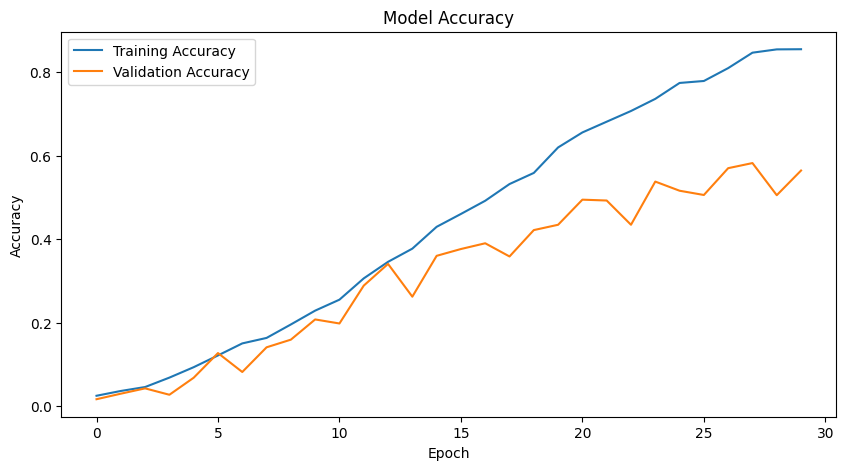

In [38]:
# Plot training history
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

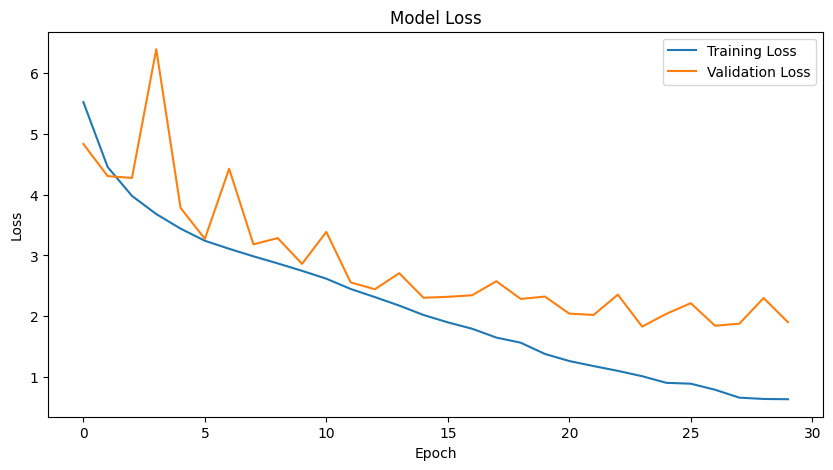

In [39]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

62/62 ━━━━━━━━━━━━━━━━━━━━ 15s 147ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.02      0.02      0.02        45
           2       0.00      0.00      0.00        39
           3       0.00      0.00      0.00        41
           4       0.03      0.02      0.03        42
           5       0.00      0.00      0.00        35
           6       0.00      0.00      0.00        36
           7       0.00      0.00      0.00        42
           8       0.00      0.00      0.00        42
           9       0.03      0.03      0.03        37
          10       0.00      0.00      0.00        39
          11       0.06      0.06      0.06        36
          12       0.09      0.11      0.10        37
          13       0.08      0.08      0.08        36
          14       0.00      0.00      0.00        36
          15       0.00      0.00      0.00        35
          16       0.00      0.00      

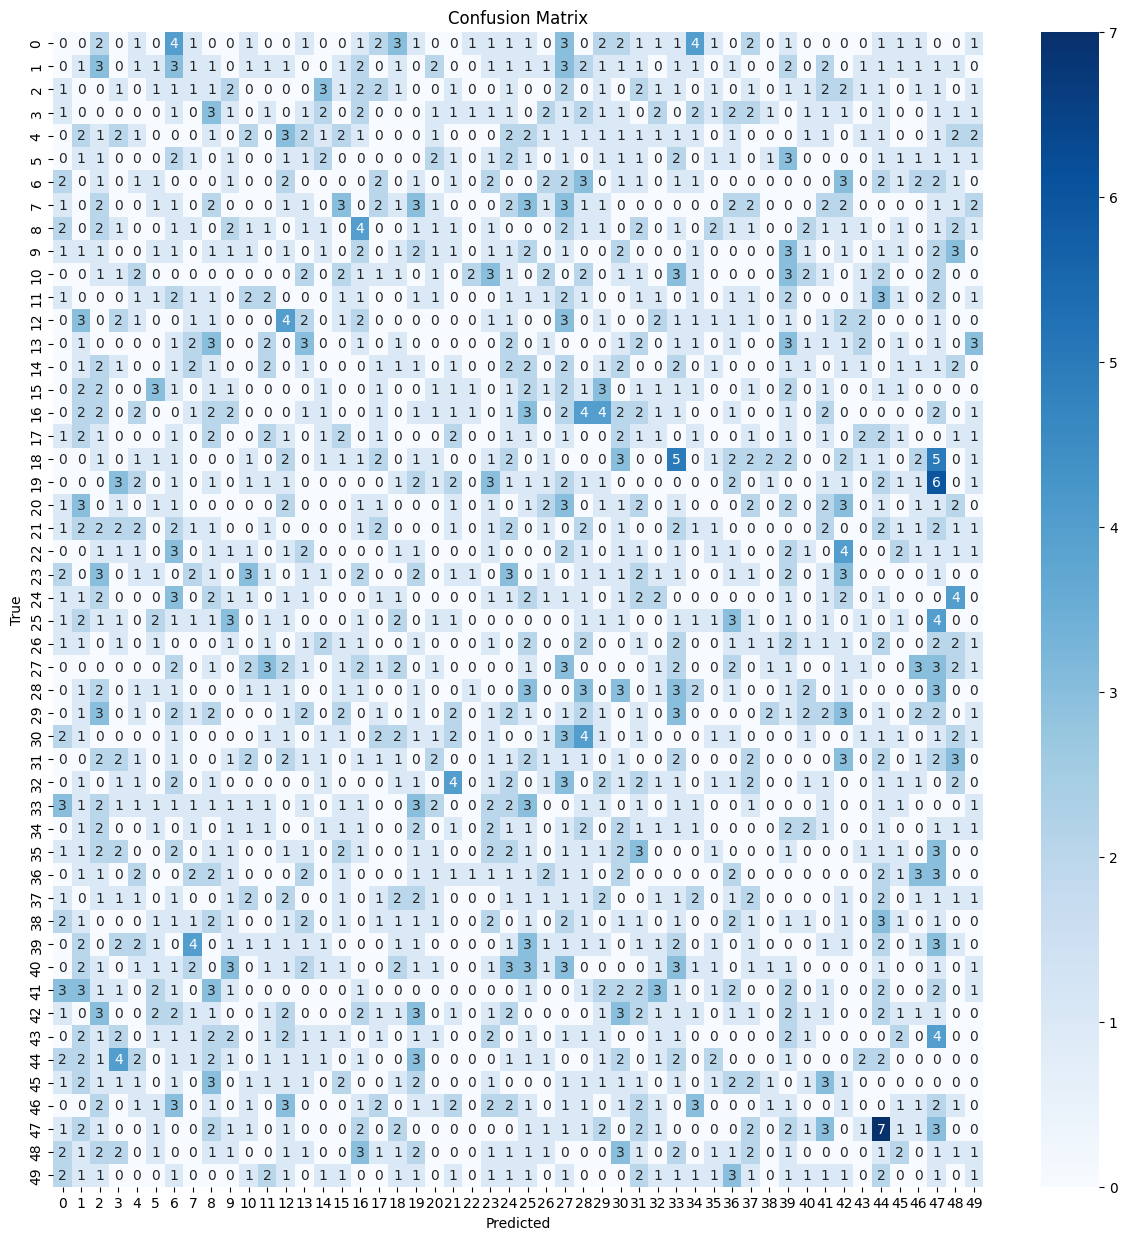

In [40]:
# evaluation metrics

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np

# Predict on the test dataset
predictions = model.predict(test_dataset)
predicted_classes = np.argmax(predictions, axis=1)

# Get true classes
true_classes = []
for _, labels in test_dataset:
  true_classes.extend(np.argmax(labels.numpy(), axis=1))
true_classes = np.array(true_classes)

# Generate classification report
print(classification_report(true_classes, predicted_classes))

# Generate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

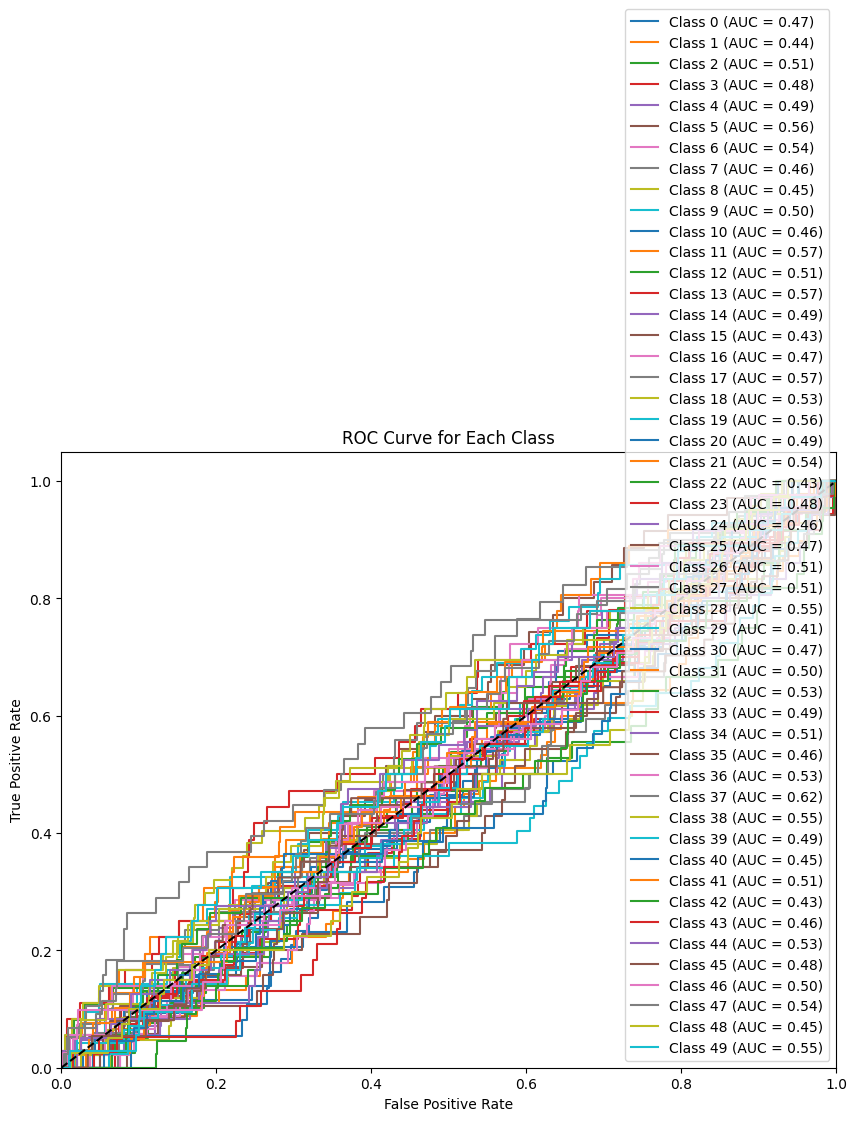

In [41]:
# ROC and AUC for all classes in test_dataset

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the output
y_test_binarized = label_binarize(true_classes, classes=np.arange(num_classes))
y_pred_binarized = predictions

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc="lower right")
plt.show()

In [42]:
# Overall AUC
overall_auc = auc(fpr[1], tpr[1])
print(f"Overall AUC: {overall_auc:.2f}")

Overall AUC: 0.44


In [43]:
# Test on a single image
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Import necessary functions

def test_single_image(image_path, class_labels): # Add class_labels as an argument
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image) / 255.0  # Normalize
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    prediction = model.predict(image_array)
    predicted_class = class_labels[np.argmax(prediction)] # Use class_labels for prediction

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()